In [1]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder

import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
import plotly
import chart_studio.plotly as py
import plotly.express as px
import cufflinks as cf
cf.go_offline()

import os

import holidays

import warnings
warnings.filterwarnings('ignore')

In [2]:
%%time
path_dataset = r'C:\Users\patri\Google trends for buildings\Dataset\GEPIII_dataset'

df_train = pd.read_feather(os.path.join(path_dataset,'train.feather'))

weather_train = pd.read_feather(os.path.join(path_dataset,'weather_train.feather'))
weather_test = pd.read_feather(os.path.join(path_dataset,'weather_test.feather'))

building = pd.read_feather(os.path.join(path_dataset,'building_metadata.feather'))

le = LabelEncoder()
building['primary_use'] = le.fit_transform(building['primary_use'])

Wall time: 221 ms


## Google trends

In [3]:
path_trends = r'C:\Users\patri\Google trends for buildings\Dataset'
file = 'df_googleTrend_topic_20210406.pickle'
df_googleTrend_topic_merged = pd.read_pickle(os.path.join(path_trends, file)).sort_index()

df_googleTrend_topic_merged = df_googleTrend_topic_merged.interpolate()

df_googleTrend_topic_merged

,CA_Career,CA_Company,CA_Education,CA_Employment,CA_Enterprise,CA_Google,CA_Google Classroom,CA_Google Docs,CA_Google Drive,CA_Health Care,...,US_Residential building,US_Retail,US_School,US_School district,US_Science,US_Secondary school,US_Technology,US_Utility,US_Warehouse,US_storage
date,,,,,,,,,,,,,,,,,,,,,
2016-01-01,-1.637050,-2.010306,-1.218619,-1.839097,-2.233285,-1.033064,-0.984700,-1.190522,-1.570083,-2.242986,...,-0.292565,0.655597,-1.751627,-1.548452,-1.331072,-1.833676,-1.960736,-1.129372,-1.531382,0.110405
2016-01-02,-0.953329,-1.699726,-0.706947,-1.377623,-1.428354,-1.227533,-1.070068,-1.041021,-1.531826,-1.878145,...,0.204981,0.046385,-1.391724,-1.164136,-0.847735,-1.291567,-1.906615,-1.184466,-0.651313,0.110405
2016-01-03,-0.742953,-1.389145,-0.934356,-1.428898,-1.083383,-0.935830,-1.006042,-0.951320,-1.264034,-1.721785,...,-0.983600,-0.105918,-0.671917,-0.267400,-0.654401,-0.957961,-1.203041,-0.716166,-0.777037,-0.441035
2016-01-04,1.045242,0.598570,0.884921,1.545045,0.871449,0.425451,-0.002967,-0.263615,0.572261,0.258778,...,0.813092,-0.277259,1.607470,3.639809,0.505607,0.710068,0.204105,-0.523337,0.354480,-0.091790
2016-01-05,1.728964,0.847035,1.112331,1.339946,0.353993,0.425451,-0.024309,-0.024413,0.266212,0.779978,...,-0.458413,-0.239183,1.067615,1.910389,1.085611,0.584966,0.853558,-0.688619,0.647837,0.183930
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-12-27,-1.527578,-1.076350,-2.031472,-0.869256,-0.681949,-0.925210,-1.177585,-1.368253,-1.510374,-0.684214,...,-0.401073,0.501484,-1.520183,-1.268215,-1.326939,-1.542094,-1.399374,-0.369563,0.047030,-0.379788
2018-12-28,-1.108932,-1.145681,-1.264956,-1.200809,-1.550535,-1.137309,-1.243969,-1.477271,-1.729988,-0.367104,...,-0.464454,0.309800,-1.520183,-1.172772,-1.428614,-1.481530,-0.901392,-0.077421,-0.120080,-0.442056
2018-12-29,-1.527578,-1.423004,-1.913546,-1.808655,-2.018235,-1.349407,-1.210777,-1.331914,-1.598220,-2.206343,...,1.246818,0.501484,-1.675955,-1.459102,-1.479452,-1.481530,-1.676031,-1.070705,-1.874744,2.110938


In [4]:
df_googleTrend_topic_merged = df_googleTrend_topic_merged.reset_index().melt(id_vars='date',var_name='topic',value_name='calendar_value')
df_googleTrend_topic_merged = df_googleTrend_topic_merged.rename(columns={'topic':'geo_topic'})
df_googleTrend_topic_merged

,date,geo_topic,calendar_value
0,2016-01-01,CA_Career,-1.637050
1,2016-01-02,CA_Career,-0.953329
2,2016-01-03,CA_Career,-0.742953
3,2016-01-04,CA_Career,1.045242
4,2016-01-05,CA_Career,1.728964
...,...,...,...
150147,2018-12-27,US_storage,-0.379788
150148,2018-12-28,US_storage,-0.442056
150149,2018-12-29,US_storage,2.110938
150150,2018-12-30,US_storage,-0.753397


In [5]:
df_cluster_topics = pd.read_pickle(os.path.join(path_trends, 'df_corr_idxmax_merged_20210406.pickle')).reset_index()
df_cluster_topics = df_cluster_topics.rename(columns={'index':'geo_topic', 'R2':'corr'})
df_cluster_topics = df_cluster_topics.drop('level_0',axis=1)
df_cluster_topics

,geo_topic,merged_id,corr,corr_abs,count,site_id,building_id,meter,primary_use,square_feet,year_built,floor_count,country,topic,topic_type
0,US_Lodging,site0_bldg0_meter0,0.623851,0.623851,5405,site0,0,0,Education,7432,2008.0,NaN,US,Lodging,Google trend
1,US_Retail,site0_bldg100_meter0,0.311244,0.311244,5405,site0,100,0,Lodging/residential,24456,1968.0,NaN,US,Retail,Google trend
2,US_Education,site0_bldg101_meter0,0.462664,0.462664,5401,site0,101,0,Office,18860,1986.0,NaN,US,Education,Google trend
3,US_Lodging,site0_bldg102_meter0,0.759592,0.759592,5405,site0,102,0,Office,15876,1983.0,NaN,US,Lodging,Google trend
4,US_Google Docs,site0_bldg103_meter0,0.494782,0.494782,5404,site0,103,0,Education,21657,2016.0,NaN,US,Google Docs,Google trend
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2375,US_Google Docs,site15_bldg1444_meter0,0.472436,0.472436,7445,site15,1444,0,Entertainment/public assembly,19619,1914.0,NaN,US,Google Docs,Google trend
2376,US_Science,site15_bldg1445_meter0,0.238057,0.238057,7449,site15,1445,0,Education,4298,NaN,NaN,US,Science,Google trend
2377,US_Education,site15_bldg1446_meter0,0.823792,0.823792,7472,site15,1446,0,Entertainment/public assembly,11265,1997.0,NaN,US,Education,Google trend
2378,US_Google Docs,site15_bldg1447_meter0,0.508164,0.508164,7471,site15,1447,0,Lodging/residential,29775,2001.0,NaN,US,Google Docs,Google trend


## Load Test Data

In [6]:
df_test = pd.read_feather(os.path.join(path_dataset,'test.feather'))

df_test = df_test.merge(df_cluster_topics, on=['building_id','meter'],how='left')
df_test['date'] = pd.to_datetime(df_test['timestamp'].dt.date)
df_test = df_test.merge(df_googleTrend_topic_merged, on=['date','geo_topic'],how='left')
df_test = df_test.drop(['geo_topic', 'date'],axis=1)

df_test

,row_id,building_id,meter,timestamp,merged_id,corr,corr_abs,count,site_id,primary_use,square_feet,year_built,floor_count,country,topic,topic_type,calendar_value
0,0,0,0,2017-01-01 00:00:00,site0_bldg0_meter0,0.623851,0.623851,5405,site0,Education,7432,2008.0,NaN,US,Lodging,Google trend,0.111146
1,1,1,0,2017-01-01 00:00:00,site0_bldg1_meter0,0.587071,0.587071,5405,site0,Education,2720,2004.0,NaN,US,Lodging,Google trend,0.111146
2,2,2,0,2017-01-01 00:00:00,site0_bldg2_meter0,0.510681,0.510681,5405,site0,Education,5376,1991.0,NaN,US,Primary school,Google trend,-1.285704
3,3,3,0,2017-01-01 00:00:00,site0_bldg3_meter0,0.310158,0.310158,5405,site0,Education,23685,2002.0,NaN,US,Lodging,Google trend,0.111146
4,4,4,0,2017-01-01 00:00:00,site0_bldg4_meter0,0.519546,0.519546,5405,site0,Education,116607,1975.0,NaN,US,Lodging,Google trend,0.111146
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41697595,41697595,1444,0,2018-05-09 07:00:00,site15_bldg1444_meter0,0.472436,0.472436,7445,site15,Entertainment/public assembly,19619,1914.0,NaN,US,Google Docs,Google trend,1.048834
41697596,41697596,1445,0,2018-05-09 07:00:00,site15_bldg1445_meter0,0.238057,0.238057,7449,site15,Education,4298,NaN,NaN,US,Science,Google trend,0.817816
41697597,41697597,1446,0,2018-05-09 07:00:00,site15_bldg1446_meter0,0.823792,0.823792,7472,site15,Entertainment/public assembly,11265,1997.0,NaN,US,Education,Google trend,0.992121
41697598,41697598,1447,0,2018-05-09 07:00:00,site15_bldg1447_meter0,0.508164,0.508164,7471,site15,Lodging/residential,29775,2001.0,NaN,US,Google Docs,Google trend,1.048834


## Load prediction results

In [7]:
df_solution = pd.read_csv(os.path.join(path_dataset, 'solution.csv'))
df_solution = df_solution.rename(columns={'meter_reading':'meter_reading_solution'})
df_solution

,row_id,meter_reading_solution,Usage
0,0,173.3700,Public
1,1,53.5127,Public
2,2,6.1430,Public
3,3,101.7010,Public
4,4,1141.2400,Public
...,...,...,...
41697595,41697595,-9999.0000,Ignored
41697596,41697596,-9999.0000,Ignored
41697597,41697597,-9999.0000,Ignored
41697598,41697598,-9999.0000,Ignored


In [8]:
df_submission_baseline = pd.read_csv('submission_baseline.csv')
df_submission_baseline = df_submission_baseline.rename(columns={'meter_reading':'meter_reading_baseline'})
df_submission_baseline

,row_id,meter_reading_baseline
0,0,136.899350
1,1,74.436104
2,2,9.900030
3,3,255.450380
4,4,952.865900
...,...,...
41697595,41697595,6.714796
41697596,41697596,4.381226
41697597,41697597,3.656570
41697598,41697598,181.845900


In [9]:
df_submission_googleTrend = pd.read_csv('submission_googleTrend_allTopics_20210406.csv')
df_submission_googleTrend = df_submission_googleTrend.rename(columns={'meter_reading':'meter_reading_googleTrend'})
df_submission_googleTrend

,row_id,meter_reading_googleTrend
0,0,188.195740
1,1,68.501530
2,2,11.738131
3,3,213.563740
4,4,850.077000
...,...,...
41697595,41697595,7.089417
41697596,41697596,4.515237
41697597,41697597,4.532064
41697598,41697598,188.526760


In [10]:
df_holiday_merged = pd.DataFrame()

for country, country_abbr in zip(['us','uk', 'canada', 'ireland'], ['US', 'GB', 'CA', 'IE']):
    year = '2017'

    df_holiday = pd.read_html('https://www.timeanddate.com/holidays/'+country+'/'+year)[0]
    df_holiday.columns = df_holiday.columns.get_level_values(0)
    df_holiday = df_holiday.loc[df_holiday['Date'].str.len()<100]
    df_holiday = df_holiday[['Date', 'Name', 'Type']]
    df_holiday = df_holiday[df_holiday['Type'].str.contains('Federal|Bank|Public|National')]
    df_holiday = df_holiday[~df_holiday['Type'].str.contains('Local')]
    df_holiday['Date'] = year + ' ' + df_holiday['Date']
    df_holiday['Date'] = pd.to_datetime(df_holiday['Date'])
    df_holiday = df_holiday.rename(columns={'Date':'date'})

    df_holiday = df_holiday.drop_duplicates(subset=['date'])
    df_holiday = df_holiday.set_index('date')
    df_holiday.loc['2017-12-31'] = 0
    df_holiday = df_holiday.asfreq('D')

    df_holiday.columns = 'holiday_' + df_holiday.columns
    df_holiday.loc[~df_holiday['holiday_Name'].isna(), 'holiday_Type'] = 'Holiday'
    df_holiday.loc[df_holiday['holiday_Name'].isna(), 'holiday_Type'] = 'Non-holiday'
    df_holiday.loc[df_holiday['holiday_Name'].isna(), 'holiday_Name'] = 'Non-holiday'
    
    df_holiday = df_holiday.reset_index()
    df_holiday['country'] = country_abbr

    df_holiday_merged = pd.concat([df_holiday_merged, df_holiday],axis=0,ignore_index=True)

df_holiday_merged

,date,holiday_Name,holiday_Type,country
0,2017-01-01,New Year's Day,Holiday,US
1,2017-01-02,Day off for New Year's Day,Holiday,US
2,2017-01-03,Non-holiday,Non-holiday,US
3,2017-01-04,Non-holiday,Non-holiday,US
4,2017-01-05,Non-holiday,Non-holiday,US
...,...,...,...,...
1455,2017-12-27,Non-holiday,Non-holiday,IE
1456,2017-12-28,Non-holiday,Non-holiday,IE
1457,2017-12-29,Non-holiday,Non-holiday,IE
1458,2017-12-30,Non-holiday,Non-holiday,IE


In [11]:
df_test['date'] = pd.to_datetime(df_test['timestamp'].dt.date)
df_test = df_test.merge(df_holiday_merged, on=['date','country'])

In [12]:
df_test = df_test.merge(df_submission_baseline,  on='row_id', how='left')
df_test = df_test.merge(df_submission_googleTrend,  on='row_id', how='left')
df_test = df_test.merge(df_solution,  on='row_id', how='left')

df_test['SLE_baseline'] = (np.log1p(df_test['meter_reading_baseline'])-np.log1p(df_test['meter_reading_solution']))**2
df_test['SLE_googleTrend'] = (np.log1p(df_test['meter_reading_googleTrend'])-np.log1p(df_test['meter_reading_solution']))**2
df_test['SLE_delta'] = df_test['SLE_googleTrend']-df_test['SLE_baseline']

df_test

,row_id,building_id,meter,timestamp,merged_id,corr,corr_abs,count,site_id,primary_use,...,date,holiday_Name,holiday_Type,meter_reading_baseline,meter_reading_googleTrend,meter_reading_solution,Usage,SLE_baseline,SLE_googleTrend,SLE_delta
0,0,0,0,2017-01-01 00:00:00,site0_bldg0_meter0,0.623851,0.623851,5405,site0,Education,...,2017-01-01,New Year's Day,Holiday,136.899350,188.195740,173.3700,Public,0.055063,0.006659,-0.048404
1,1,1,0,2017-01-01 00:00:00,site0_bldg1_meter0,0.587071,0.587071,5405,site0,Education,...,2017-01-01,New Year's Day,Holiday,74.436104,68.501530,53.5127,Public,0.105529,0.059008,-0.046521
2,2,2,0,2017-01-01 00:00:00,site0_bldg2_meter0,0.510681,0.510681,5405,site0,Education,...,2017-01-01,New Year's Day,Holiday,9.900030,11.738131,6.1430,Public,0.178618,0.334624,0.156006
3,3,3,0,2017-01-01 00:00:00,site0_bldg3_meter0,0.310158,0.310158,5405,site0,Education,...,2017-01-01,New Year's Day,Holiday,255.450380,213.563740,101.7010,Public,0.837432,0.542852,-0.294580
4,4,4,0,2017-01-01 00:00:00,site0_bldg4_meter0,0.519546,0.519546,5405,site0,Education,...,2017-01-01,New Year's Day,Holiday,952.865900,850.077000,1141.2400,Public,0.032480,0.086579,0.054099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20848795,41696495,1031,1,2017-12-17 23:00:00,site11_bldg1031_meter1,0.594509,0.594509,8692,site11,Education,...,2017-12-17,Non-holiday,Non-holiday,0.152190,0.143748,-9999.0000,Ignored,NaN,NaN,NaN
20848796,41696496,1031,3,2017-12-17 23:00:00,site11_bldg1031_meter3,0.363316,0.363316,8693,site11,Education,...,2017-12-17,Non-holiday,Non-holiday,107.046295,93.825460,-9999.0000,Ignored,NaN,NaN,NaN
20848797,41696497,1032,0,2017-12-17 23:00:00,site11_bldg1032_meter0,0.843227,0.843227,8782,site11,Education,...,2017-12-17,Non-holiday,Non-holiday,251.127720,219.354310,-9999.0000,Ignored,NaN,NaN,NaN
20848798,41696498,1032,1,2017-12-17 23:00:00,site11_bldg1032_meter1,0.624684,0.624684,8782,site11,Education,...,2017-12-17,Non-holiday,Non-holiday,0.000000,0.000000,-9999.0000,Ignored,NaN,NaN,NaN


In [13]:
df_test = df_test[df_test['timestamp'].dt.year==2017]

In [14]:
df_groupby = df_test[df_test['meter_reading_solution']>=0].pivot_table(columns='meter',values=['SLE_baseline', 'SLE_googleTrend'])**0.5
df_groupby

meter,0,1,2,3
SLE_baseline,0.763786,1.292828,1.311489,1.793103
SLE_googleTrend,0.760797,1.307834,1.322950,1.798084


In [15]:
df_cluster_topics = df_cluster_topics.sort_values('corr')
df_cluster_topics.loc[df_cluster_topics['corr']<0.6, 'corr_group'] = 'poorly correlated'
df_cluster_topics.loc[(df_cluster_topics['corr']>=0.6)&(df_cluster_topics['corr']<0.8), 'corr_group'] = 'fairly correlated'
df_cluster_topics.loc[df_cluster_topics['corr']>0.8, 'corr_group'] = 'highly correlated'

In [16]:
df_SLE = df_test[df_test['meter_reading_solution']>=0].groupby(['merged_id', 'topic'])[['SLE_baseline', 'SLE_googleTrend','SLE_delta']].mean()
df_SLE_holidays = df_test[(df_test['meter_reading_solution']>=0)&(df_test['holiday_Type']=='Holiday')].groupby(['merged_id', 'topic'])[['SLE_baseline', 'SLE_googleTrend','SLE_delta']].mean()
df_SLE_holidays = df_SLE_holidays.rename(columns={'SLE_baseline':'SLE_baseline_holidays',
                                                  'SLE_googleTrend':'SLE_googleTrend_holidays',
                                                  'SLE_delta':'SLE_delta_holidays'})
df_SLE_nonHolidays = df_test[(df_test['meter_reading_solution']>=0)&(df_test['holiday_Type']=='Non-holiday')].groupby(['merged_id', 'topic'])[['SLE_baseline', 'SLE_googleTrend','SLE_delta']].mean()
df_SLE_nonHolidays = df_SLE_nonHolidays.rename(columns={'SLE_baseline':'SLE_baseline_nonHolidays',
                                                         'SLE_googleTrend':'SLE_googleTrend_nonHolidays',
                                                         'SLE_delta':'SLE_delta_nonHolidays'})
df_cluster_topics = df_cluster_topics.merge(df_SLE.reset_index(), on=['merged_id','topic'])
df_cluster_topics = df_cluster_topics.merge(df_SLE_holidays.reset_index(), on=['merged_id','topic'])
df_cluster_topics = df_cluster_topics.merge(df_SLE_nonHolidays.reset_index(), on=['merged_id','topic'])
df_cluster_topics

,geo_topic,merged_id,corr,corr_abs,count,site_id,building_id,meter,primary_use,square_feet,...,corr_group,SLE_baseline,SLE_googleTrend,SLE_delta,SLE_baseline_holidays,SLE_googleTrend_holidays,SLE_delta_holidays,SLE_baseline_nonHolidays,SLE_googleTrend_nonHolidays,SLE_delta_nonHolidays
0,US_Parking lot,site8_bldg870_meter0,0.013407,0.013407,7895,site8,870,0,Entertainment/public assembly,755,...,poorly correlated,0.144409,0.144613,0.000204,0.085838,0.083265,-0.002573,0.146526,0.146830,0.000304
1,US_Warehouse,site9_bldg893_meter2,0.028678,0.028678,8233,site9,893,2,Education,47191,...,poorly correlated,0.493357,0.501372,0.008015,0.447258,0.460302,0.013044,0.495062,0.502891,0.007829
2,US_Lodging,site0_bldg103_meter1,0.033183,0.033183,7266,site0,103,1,Education,21657,...,poorly correlated,4.383324,4.397785,0.014461,5.044124,5.004586,-0.039538,4.358908,4.375364,0.016456
3,US_High school,site9_bldg876_meter2,0.033280,0.033280,8391,site9,876,2,Education,55240,...,poorly correlated,5.804732,5.545790,-0.258942,8.664798,8.412626,-0.252173,5.699079,5.439887,-0.259192
4,US_Retail,site14_bldg1244_meter3,0.042842,0.042842,8761,site14,1244,3,Public services,95526,...,poorly correlated,1.785974,1.784585,-0.001389,1.278275,1.147213,-0.131062,1.804724,1.808125,0.003400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2374,US_Microsoft Outlook,site13_bldg1133_meter0,0.955851,0.955851,8783,site13,1133,0,Office,82302,...,highly correlated,0.003843,0.002775,-0.001068,0.012509,0.004917,-0.007592,0.003523,0.002696,-0.000827
2375,US_Microsoft Outlook,site13_bldg1136_meter0,0.957228,0.957228,8784,site13,1136,0,Office,79782,...,highly correlated,0.026038,0.018577,-0.007462,0.226853,0.065874,-0.160978,0.018622,0.016830,-0.001792
2376,US_Microsoft Excel,site13_bldg1142_meter0,0.960706,0.960706,8783,site13,1142,0,Office,103718,...,highly correlated,0.047050,0.043928,-0.003122,0.084171,0.027314,-0.056857,0.045679,0.044542,-0.001138
2377,US_Google,site3_bldg403_meter0,0.960813,0.960813,479,site3,403,0,Education,49500,...,highly correlated,0.058796,0.031459,-0.027338,0.162493,0.030795,-0.131698,0.054933,0.031483,-0.023449


In [17]:
df_RMSLE = df_cluster_topics.groupby(['meter','corr_group','merged_id'])['SLE_baseline','SLE_googleTrend'].agg(['mean'])**0.5
df_RMSLE = df_RMSLE.reset_index()
df_RMSLE.columns = ['meter','corr_group','merged_id','RMSLE_baseline','RMSLE_googleTrend']
df_RMSLE['RMSLE_delta'] = df_RMSLE['RMSLE_googleTrend']-df_RMSLE['RMSLE_baseline']
df_RMSLE

,meter,corr_group,merged_id,RMSLE_baseline,RMSLE_googleTrend,RMSLE_delta
0,0,fairly correlated,site0_bldg0_meter0,0.283689,0.239457,-0.044233
1,0,fairly correlated,site0_bldg102_meter0,3.228879,3.262480,0.033601
2,0,fairly correlated,site0_bldg11_meter0,0.220964,0.134634,-0.086330
3,0,fairly correlated,site0_bldg23_meter0,0.096681,0.117230,0.020549
4,0,fairly correlated,site0_bldg27_meter0,0.259438,0.250276,-0.009162
...,...,...,...,...,...,...
2374,3,poorly correlated,site2_bldg284_meter3,1.480850,1.484017,0.003167
2375,3,poorly correlated,site2_bldg287_meter3,0.364452,0.377207,0.012755
2376,3,poorly correlated,site7_bldg793_meter3,2.586692,2.619889,0.033197
2377,3,poorly correlated,site7_bldg794_meter3,2.044154,2.102296,0.058142


In [18]:
df_RMSLE_holidays = df_cluster_topics.groupby(['meter','corr_group','merged_id'])['SLE_baseline_holidays','SLE_googleTrend_holidays'].agg(['mean'])**0.5
df_RMSLE_holidays = df_RMSLE_holidays.reset_index()
df_RMSLE_holidays.columns = ['meter','corr_group','merged_id','RMSLE_baseline_holidays','RMSLE_googleTrend_holidays']
df_RMSLE_holidays['RMSLE_delta_holidays'] = df_RMSLE_holidays['RMSLE_googleTrend_holidays']-df_RMSLE_holidays['RMSLE_baseline_holidays']

df_RMSLE_holidays.groupby(['meter','corr_group'])['RMSLE_delta_holidays'].agg(['mean','std','max','min','count'])

mean       std       max       min  count
meter corr_group                                                      
0     fairly correlated -0.048320  0.085215  0.286605 -0.591359    409
      highly correlated -0.131619  0.125099  0.120571 -0.694950    291
      poorly correlated -0.022231  0.061663  0.343084 -0.288377    712
1     fairly correlated  0.016674  0.087823  0.244267 -0.627467    307
      poorly correlated  0.016886  0.137058  0.752789 -0.901493    191
2     fairly correlated -0.092917       NaN -0.092917 -0.092917      1
      poorly correlated  0.009086  0.125619  1.632754 -0.408321    323
3     fairly correlated  0.009980  0.122493  0.096596 -0.076636      2
      highly correlated -0.038692       NaN -0.038692 -0.038692      1
      poorly correlated -0.008340  0.101734  0.484815 -0.408698    142

In [19]:
df_RMSLE_holidays.groupby(['meter','corr_group'])['RMSLE_delta_holidays'].agg(['mean'])/df_RMSLE_holidays.groupby(['meter','corr_group'])['RMSLE_baseline_holidays'].agg(['mean'])*100

mean
meter corr_group                  
0     fairly correlated  -9.749064
      highly correlated -23.997697
      poorly correlated  -4.930479
1     fairly correlated   1.769907
      poorly correlated   1.332726
2     fairly correlated -12.661760
      poorly correlated   0.921843
3     fairly correlated   0.800956
      highly correlated  -3.014767
      poorly correlated  -0.580659

In [20]:
df_RMSLE_nonHolidays = df_cluster_topics.groupby(['meter','corr_group','merged_id'])['SLE_baseline_nonHolidays','SLE_googleTrend_nonHolidays'].agg(['mean'])**0.5
df_RMSLE_nonHolidays = df_RMSLE_nonHolidays.reset_index()
df_RMSLE_nonHolidays.columns = ['meter','corr_group','merged_id','RMSLE_baseline_nonHolidays','RMSLE_googleTrend_nonHolidays']
df_RMSLE_nonHolidays['RMSLE_delta_nonHolidays'] = df_RMSLE_nonHolidays['RMSLE_googleTrend_nonHolidays']-df_RMSLE_nonHolidays['RMSLE_baseline_nonHolidays']

df_RMSLE_nonHolidays.groupby(['meter','corr_group'])['RMSLE_delta_nonHolidays'].agg(['mean','std','max','min','count'])

mean       std       max       min  count
meter corr_group                                                      
0     fairly correlated -0.004496  0.042582  0.312200 -0.588977    409
      highly correlated -0.006050  0.021148  0.124146 -0.178382    291
      poorly correlated -0.003880  0.035026  0.376841 -0.430039    712
1     fairly correlated  0.001411  0.024327  0.239761 -0.072939    307
      poorly correlated  0.017449  0.081757  0.731487 -0.250747    191
2     fairly correlated -0.114804       NaN -0.114804 -0.114804      1
      poorly correlated  0.004390  0.080857  1.342320 -0.179471    323
3     fairly correlated  0.003791  0.010998  0.011568 -0.003986      2
      highly correlated  0.001680       NaN  0.001680  0.001680      1
      poorly correlated  0.004783  0.033104  0.158510 -0.106297    142

In [21]:
df_RMSLE_nonHolidays.groupby(['meter','corr_group'])['RMSLE_delta_nonHolidays'].agg(['mean'])/df_RMSLE_nonHolidays.groupby(['meter','corr_group'])['RMSLE_baseline_nonHolidays'].agg(['mean'])*100

mean
meter corr_group                  
0     fairly correlated  -0.882662
      highly correlated  -1.108472
      poorly correlated  -0.818187
1     fairly correlated   0.149176
      poorly correlated   1.428211
2     fairly correlated -10.776925
      poorly correlated   0.381810
3     fairly correlated   0.243671
      highly correlated   0.172634
      poorly correlated   0.314272

Microsoft Excel


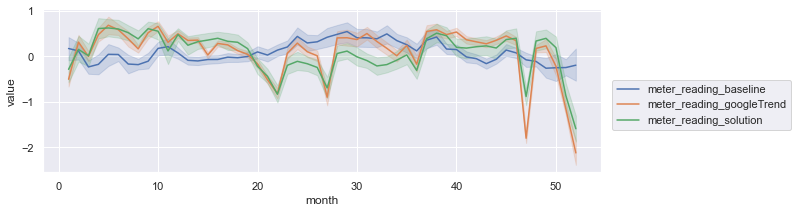

------------------------------------------------------------------------------------------------------------------------
Microsoft Outlook


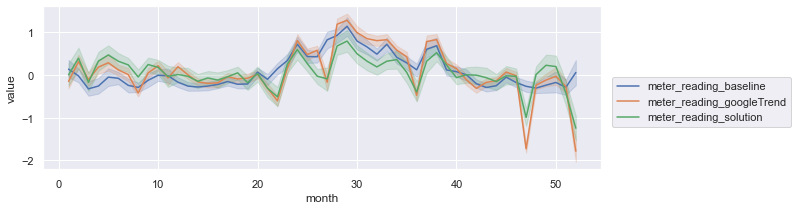

------------------------------------------------------------------------------------------------------------------------
Office 365


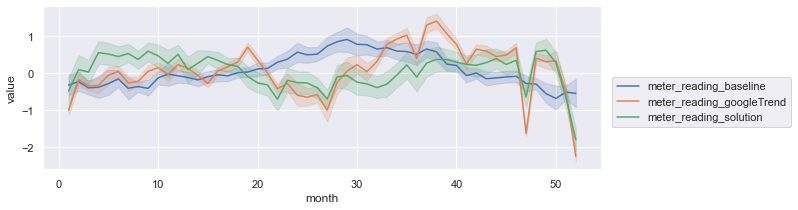

------------------------------------------------------------------------------------------------------------------------
Education


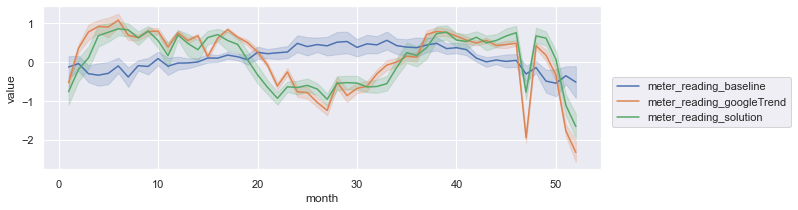

------------------------------------------------------------------------------------------------------------------------
Enterprise


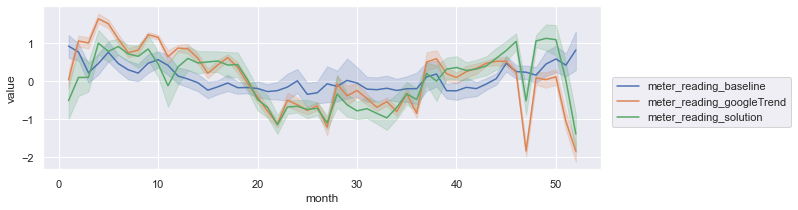

------------------------------------------------------------------------------------------------------------------------
Employment


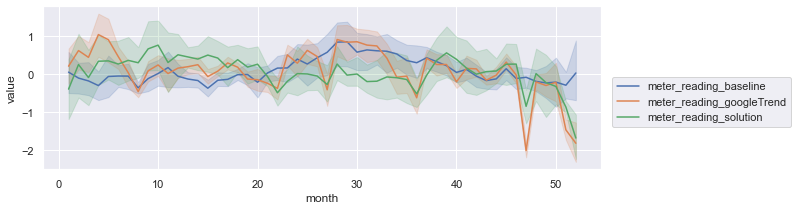

------------------------------------------------------------------------------------------------------------------------
Microsoft Office


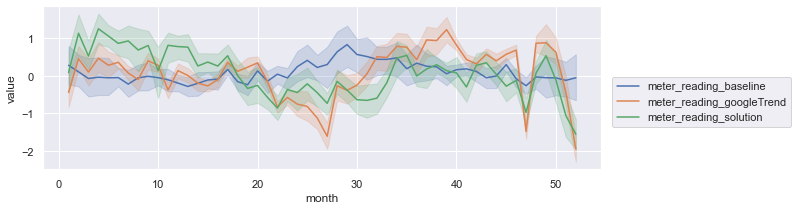

No handles with labels found to put in legend.


------------------------------------------------------------------------------------------------------------------------
Primary school


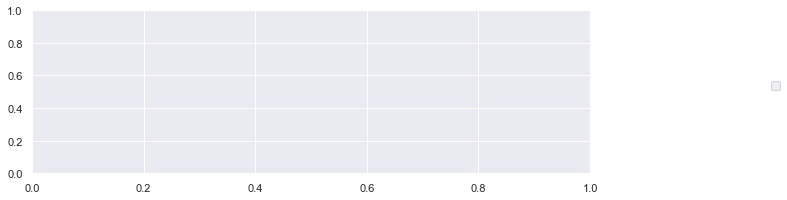

------------------------------------------------------------------------------------------------------------------------
Science


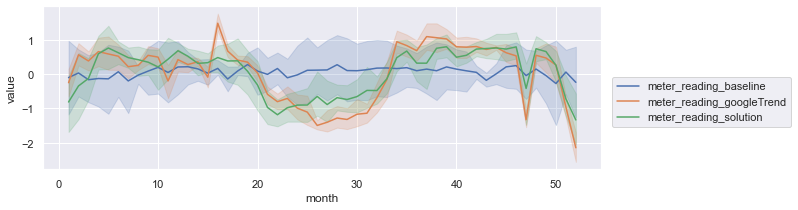

------------------------------------------------------------------------------------------------------------------------
Company


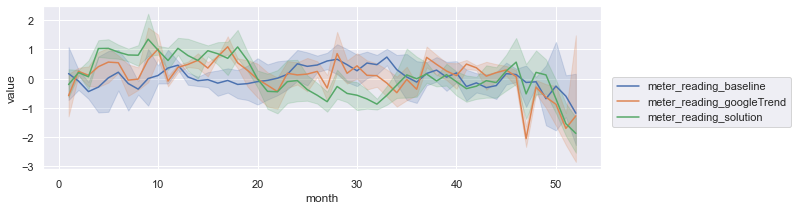

------------------------------------------------------------------------------------------------------------------------


In [22]:
country = 'US'

for topic in df_test[df_test['corr']>0.8]['topic'].value_counts().head(10).index:
    print(topic)
    try:
        solution_plot = df_test[(df_test['country']==country)&(df_test['topic']==topic)&(df_test['corr']>0.8)].pivot_table(columns='merged_id',index='timestamp',values=['meter_reading_solution','meter_reading_baseline','meter_reading_googleTrend'])
        solution_plot = solution_plot[solution_plot>0]
        solution_plot = solution_plot.resample('W').mean()
        solution_plot = (solution_plot-solution_plot.mean())/solution_plot.std()
        solution_plot = solution_plot[solution_plot<3]
        solution_plot = solution_plot[solution_plot>-3]
        solution_plot = solution_plot.reset_index().melt(id_vars='timestamp')
        solution_plot['timestamp'] = solution_plot['timestamp'].dt.week
        solution_plot = solution_plot.rename(columns={None:'variable', 'timestamp':'month'})
        
        #solution_plot.plot(figsize=(10,3), ylim=(-3,3), color='black',alpha=0.05,legend=False,title='solution')
        plt.figure(figsize=(10,3))
        sns.lineplot(x="month", y="value",hue='variable',
                    data=solution_plot)
        plt.legend(bbox_to_anchor=(1.35, 0.6))
        plt.show()

    except:
        print('None')
        pass
    
    print('------------------------------------------------------------------------------------------------------------------------')

Microsoft Excel


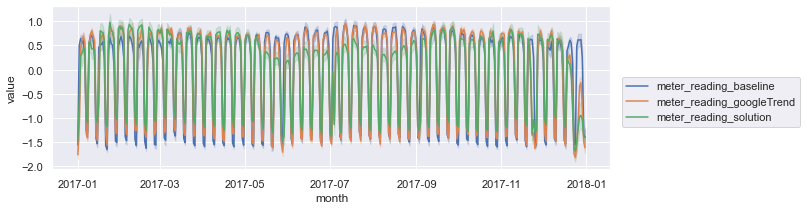

------------------------------------------------------------------------------------------------------------------------
Microsoft Outlook


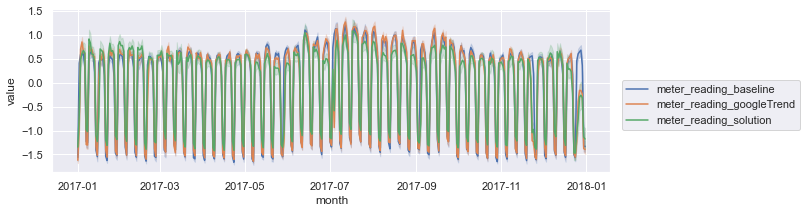

------------------------------------------------------------------------------------------------------------------------
Office 365


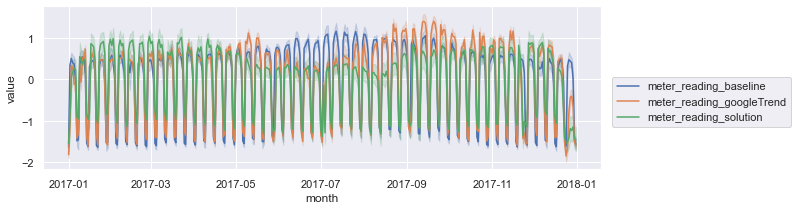

------------------------------------------------------------------------------------------------------------------------
Education


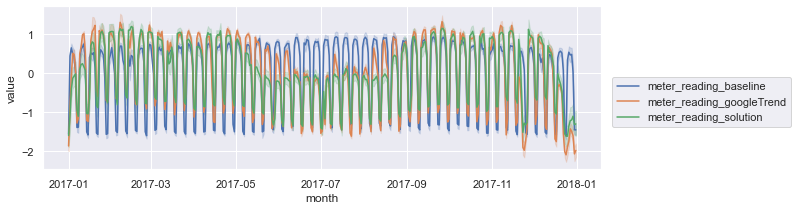

------------------------------------------------------------------------------------------------------------------------
Enterprise


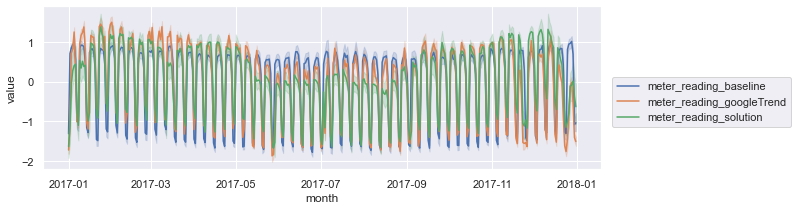

------------------------------------------------------------------------------------------------------------------------
Employment


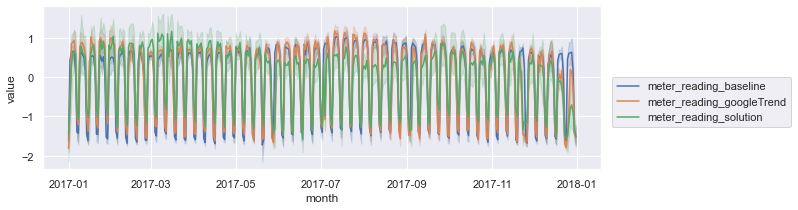

------------------------------------------------------------------------------------------------------------------------
Microsoft Office


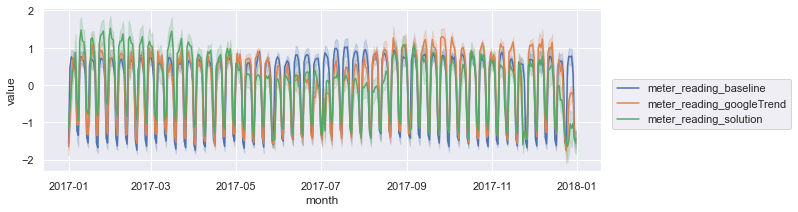

No handles with labels found to put in legend.


------------------------------------------------------------------------------------------------------------------------
Primary school


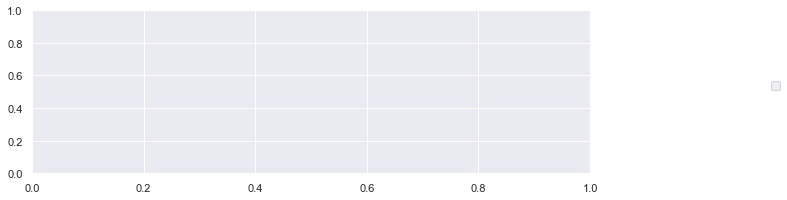

------------------------------------------------------------------------------------------------------------------------
Science


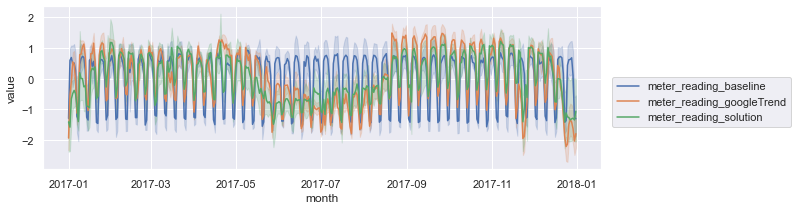

------------------------------------------------------------------------------------------------------------------------
Company


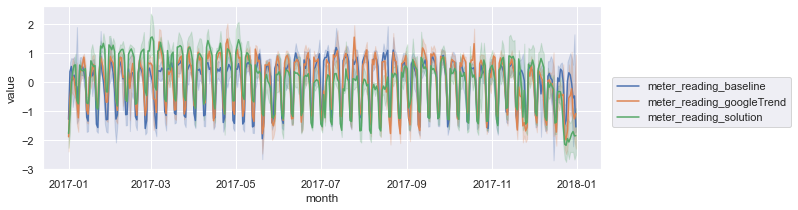

------------------------------------------------------------------------------------------------------------------------


In [23]:
country = 'US'

for topic in df_test[df_test['corr']>0.8]['topic'].value_counts().head(10).index:
    print(topic)
    try:
        solution_plot = df_test[(df_test['country']==country)&(df_test['topic']==topic)&(df_test['corr']>0.8)].pivot_table(columns='merged_id',index='timestamp',values=['meter_reading_solution','meter_reading_baseline','meter_reading_googleTrend'])
        solution_plot = solution_plot[solution_plot>0]
        solution_plot = solution_plot.resample('D').mean()
        solution_plot = (solution_plot-solution_plot.mean())/solution_plot.std()
        solution_plot = solution_plot[solution_plot<3]
        solution_plot = solution_plot[solution_plot>-3]
        solution_plot = solution_plot.reset_index().melt(id_vars='timestamp')
        #solution_plot['timestamp'] = solution_plot['timestamp'].dt.week
        solution_plot = solution_plot.rename(columns={None:'variable', 'timestamp':'month'})
        
        #solution_plot.plot(figsize=(10,3), ylim=(-3,3), color='black',alpha=0.05,legend=False,title='solution')
        plt.figure(figsize=(10,3))
        sns.lineplot(x="month", y="value",hue='variable',
                    data=solution_plot)
        plt.legend(bbox_to_anchor=(1.35, 0.6))
        plt.show()

    except:
        print('None')
        pass
    
    print('------------------------------------------------------------------------------------------------------------------------')

In [24]:
country = 'US'
topic = 'Microsoft Excel'

df_plot = df_test[(df_test['country']==country)&(df_test['topic']==topic)&(df_test['corr']>0.8)].pivot_table(columns='merged_id',index='timestamp',values=['meter_reading_solution','meter_reading_baseline','meter_reading_googleTrend'])
df_plot = df_plot[df_plot>0]
df_plot = df_plot.resample('D').mean()
df_plot = (df_plot-df_plot.mean())/df_plot.std()
df_plot = df_plot[df_plot<3]
df_plot = df_plot[df_plot>-3]
df_plot = df_plot.reset_index().melt(id_vars='timestamp')
#df_plot['timestamp'] = df_plot['timestamp'].dt.week
df_plot = df_plot.rename(columns={None:'variable'})

df_plot = df_plot.pivot_table(columns='variable',index='timestamp')
df_plot.columns = df_plot.columns.get_level_values(1)

df_plot['Avg error of baseline model'] = (df_plot['meter_reading_baseline'] - df_plot['meter_reading_solution'])
df_plot['Avg error of proposed model'] = (df_plot['meter_reading_googleTrend'] - df_plot['meter_reading_solution'])
df_plot.resample('W').mean()[['Avg error of proposed model','Avg error of baseline model']].iplot()
df_plot.resample('W').mean()[['Avg error of proposed model','Avg error of baseline model']].iplot(kind='bar')

In [25]:
country = 'US'
topic = 'Education'

df_plot = df_test[(df_test['country']==country)&(df_test['topic']==topic)&(df_test['corr']>0.8)].pivot_table(columns='merged_id',index='timestamp',values=['meter_reading_solution','meter_reading_baseline','meter_reading_googleTrend'])
df_plot = df_plot[df_plot>0]
df_plot = df_plot.resample('D').mean()
df_plot = (df_plot-df_plot.mean())/df_plot.std()
df_plot = df_plot[df_plot<3]
df_plot = df_plot[df_plot>-3]
df_plot = df_plot.reset_index().melt(id_vars='timestamp')
#df_plot['timestamp'] = df_plot['timestamp'].dt.week
df_plot = df_plot.rename(columns={None:'variable'})

df_plot = df_plot.pivot_table(columns='variable',index='timestamp')
df_plot.columns = df_plot.columns.get_level_values(1)

df_plot['Avg error of baseline model'] = (df_plot['meter_reading_baseline'] - df_plot['meter_reading_solution'])
df_plot['Avg error of proposed model'] = (df_plot['meter_reading_googleTrend'] - df_plot['meter_reading_solution'])
df_plot.resample('W').mean()[['Avg error of proposed model','Avg error of baseline model']].iplot()
df_plot.resample('W').mean()[['Avg error of proposed model','Avg error of baseline model']].iplot(kind='bar')

In [26]:
df_RMSLE = df_cluster_topics.groupby(['meter','corr_group','merged_id'])['SLE_baseline','SLE_googleTrend'].agg(['mean'])**0.5
df_RMSLE = df_RMSLE.reset_index()
df_RMSLE.columns = ['meter','corr_group','merged_id','RMSLE_baseline','RMSLE_googleTrend']
df_RMSLE['RMSLE_delta'] = df_RMSLE['RMSLE_googleTrend']-df_RMSLE['RMSLE_baseline']
df_RMSLE

,meter,corr_group,merged_id,RMSLE_baseline,RMSLE_googleTrend,RMSLE_delta
0,0,fairly correlated,site0_bldg0_meter0,0.283689,0.239457,-0.044233
1,0,fairly correlated,site0_bldg102_meter0,3.228879,3.262480,0.033601
2,0,fairly correlated,site0_bldg11_meter0,0.220964,0.134634,-0.086330
3,0,fairly correlated,site0_bldg23_meter0,0.096681,0.117230,0.020549
4,0,fairly correlated,site0_bldg27_meter0,0.259438,0.250276,-0.009162
...,...,...,...,...,...,...
2374,3,poorly correlated,site2_bldg284_meter3,1.480850,1.484017,0.003167
2375,3,poorly correlated,site2_bldg287_meter3,0.364452,0.377207,0.012755
2376,3,poorly correlated,site7_bldg793_meter3,2.586692,2.619889,0.033197
2377,3,poorly correlated,site7_bldg794_meter3,2.044154,2.102296,0.058142


In [27]:
df_RMSLE = df_RMSLE.merge(df_cluster_topics, on=['merged_id','meter','corr_group'])

In [28]:
groupby_topics = df_RMSLE[df_RMSLE['corr_group']=='highly correlated'].groupby(['topic'])['RMSLE_delta'].agg(['mean','count']).sort_values('mean')
groupby_topics = groupby_topics[groupby_topics['count']>10]
groupby_topics

,mean,count
topic,,
Education,-0.017956,32
Employment,-0.016363,13
Microsoft Outlook,-0.010655,59
Microsoft Excel,-0.010402,63
Office 365,-0.007261,49
Enterprise,-0.007247,17
Microsoft Office,-0.006408,12
Primary school,0.007267,12


In [29]:
groupby_country_topic = df_RMSLE[df_RMSLE['corr_group']=='highly correlated'].groupby(['country','topic'])[['RMSLE_baseline','RMSLE_googleTrend','RMSLE_delta']].agg(['mean','count'])
groupby_country_topic = groupby_country_topic[groupby_country_topic[('RMSLE_delta','count')]>=10]
groupby_country_topic

RMSLE_baseline       RMSLE_googleTrend        \
                                    mean count              mean count   
country topic                                                            
GB      Microsoft Excel         1.522635    10          1.521566    10   
        Office 365              1.753919    26          1.743228    26   
        Primary school          1.483556    12          1.490823    12   
US      Education               0.321729    31          0.303466    31   
        Enterprise              0.180564    14          0.172907    14   
        Microsoft Excel         0.277368    51          0.266107    51   
        Microsoft Office        0.425302    12          0.418894    12   
        Microsoft Outlook       0.306553    55          0.296081    55   
        Office 365              0.239018    23          0.235633    23   

                          RMSLE_delta        
                                 mean count  
country topic                                
GB      Microsoft Excel     -0.001068    10  
        Office 365          -0.010691    26  
        Primary school       0.007267    12  
US      Education           -0.018263    31  
        Enterprise          -0.007657    14  
        Microsoft Excel     -0.011261    51  
        Microsoft Office    -0.006408    12  
        Microsoft Outlook   -0.010472    55  
        Office 365          -0.003385    23

In [30]:
groupby_topics = df_RMSLE[df_RMSLE['corr_group']=='highly correlated'].groupby(['topic'])[['RMSLE_baseline','RMSLE_googleTrend','RMSLE_delta']].agg(['mean','count']).sort_values(('RMSLE_delta','mean'))
groupby_topics = groupby_topics[groupby_topics[('RMSLE_delta','count')]>10]
groupby_topics

RMSLE_baseline       RMSLE_googleTrend       RMSLE_delta  \
                            mean count              mean count        mean   
topic                                                                        
Education               0.383192    32          0.365236    32   -0.017956   
Employment              0.237270    13          0.220907    13   -0.016363   
Microsoft Outlook       0.339845    59          0.329190    59   -0.010655   
Microsoft Excel         0.474158    63          0.463756    63   -0.010402   
Office 365              1.042843    49          1.035582    49   -0.007261   
Enterprise              0.302616    17          0.295369    17   -0.007247   
Microsoft Office        0.425302    12          0.418894    12   -0.006408   
Primary school          1.483556    12          1.490823    12    0.007267   

                         
                  count  
topic                    
Education            32  
Employment           13  
Microsoft Outlook    59  
Microsoft Excel      63  
Office 365           49  
Enterprise           17  
Microsoft Office     12  
Primary school       12

In [31]:
df_improvement = df_test[(df_test['meter_reading_solution']>=0)&(df_test['corr']>0.8)].groupby(['merged_id', 'topic'])['SLE_delta'].mean().sort_values()
df_improvement

merged_id               topic          
site5_bldg706_meter0    Office 365        -0.526671
site5_bldg727_meter0    Office 365        -0.093724
site15_bldg1446_meter0  Education         -0.065944
site13_bldg1193_meter0  Microsoft Excel   -0.061916
site0_bldg25_meter0     Employment        -0.056919
                                             ...   
site5_bldg736_meter0    Office 365         0.106322
site5_bldg657_meter0    Office 365         0.130206
site5_bldg721_meter0    Primary school     0.146734
site5_bldg695_meter0    Google Docs        0.174535
site5_bldg730_meter0    Primary school     0.181000
Name: SLE_delta, Length: 292, dtype: float64

merged_id:　site4_bldg642_meter0
topic:　Education
RMSLE_baseline = 0.234
RMSLE_googleTrend = 0.175
RMSLE_delta = -25.5%


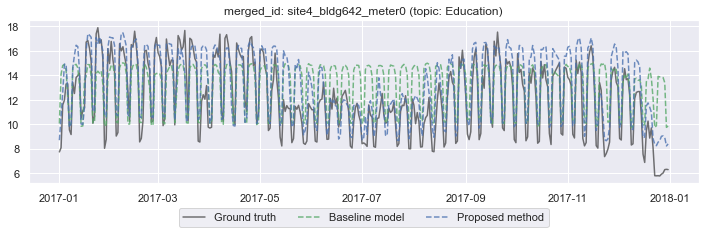

-----------------------------------------------------------------------------------------------------------
merged_id:　site13_bldg1142_meter0
topic:　Microsoft Excel
RMSLE_baseline = 0.217
RMSLE_googleTrend = 0.21
RMSLE_delta = -3.4%


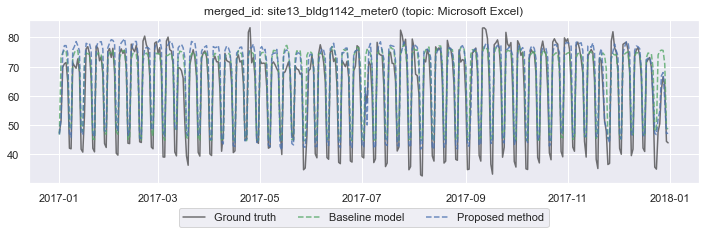

-----------------------------------------------------------------------------------------------------------


In [32]:
for merged_id, topic in zip(df_improvement.index.get_level_values(0),
                                                   df_improvement.index.get_level_values(1)):
    if ('642' in merged_id)|('1142' in merged_id):
        try:
            print('merged_id:　'+str(merged_id))
            print('topic:　'+topic)
            df_plot = df_test.loc[df_test['merged_id']==merged_id, ['meter_reading_solution', 'meter_reading_baseline', 'meter_reading_googleTrend', 'timestamp']].set_index('timestamp')
            df_plot = df_plot.sort_index().dropna().loc['2017']

            RMSLE_baseline = (((np.log1p(df_plot['meter_reading_solution'])-np.log1p(df_plot['meter_reading_baseline']))**2).mean())**0.5
            RMSLE_googleTrend = (((np.log1p(df_plot['meter_reading_solution'])-np.log1p(df_plot['meter_reading_googleTrend']))**2).mean())**0.5
            print('RMSLE_baseline = '+str(round(RMSLE_baseline,3)))
            print('RMSLE_googleTrend = '+str(round(RMSLE_googleTrend,3)))
            print('RMSLE_delta = '+str(round((RMSLE_googleTrend-RMSLE_baseline)/RMSLE_baseline*100,1))+'%')

            df_plot = df_plot.resample('D').mean()
            df_plot = df_plot[df_plot['meter_reading_solution']>0]

            #plot
            plt.figure(figsize=(12,3))
            plt.plot(df_plot.index, df_plot['meter_reading_solution'], '-k', alpha=0.6, label='Ground truth')
            plt.plot(df_plot.index, df_plot['meter_reading_baseline'], '--g', alpha=0.8, label='Baseline model')
            plt.plot(df_plot.index, df_plot['meter_reading_googleTrend'], '--b', alpha=0.8, label='Proposed method')
            plt.title('merged_id: '+str(merged_id)+' (topic: '+topic+')')
            plt.legend(loc='lower center', ncol=3, bbox_to_anchor=(0.5, -0.3))
            plt.show()       

        except:
            print('error')

        print('-----------------------------------------------------------------------------------------------------------')